In [3]:
sentence_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
verb_phrase => verb noun_phrase
Article => 一段|一个|两只
Adj* => null | Adj Adj*
Adj => 红色的| 漂亮的| 可爱的
noun => 小明| 作家 | 程序员
verb => 看着 | 发现 | 写下
"""

In [4]:
import random
print(random)

"蓝色的 | 好看的 | 小小的".split('|')


<module 'random' from 'C:\\ProgramData\\Anaconda3\\lib\\random.py'>


['蓝色的 ', ' 好看的 ', ' 小小的']

In [5]:
def adj():
    return random.choice("蓝色的 |好看的 | 小小的".split("|")).split()[0]
adj()

'蓝色的'

In [6]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()


In [7]:
for x in range(10):
   print(adj_star()) 


小小的蓝色的
蓝色的



小小的






In [8]:
adj_grammar = """
Ajd* => null | Adj Ajd*
Adj => "lansede | hongse |asdfa"
"""
def create_grammar(grammar_str, split = "=>", line_split = "\n"):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar


create_grammar(adj_grammar)

{'Ajd*': [['null'], ['Adj', 'Ajd*']],
 'Adj': [['"lansede'], ['hongse'], ['asdfa"']]}

In [9]:
choice = random.choice

def generate(gram,target):
    if target not in gram: return target
    expand = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expand if e != 'null'])


In [10]:
grammar1 = create_grammar(sentence_grammar)


In [11]:
generate(grammar1, target = "sentence")

'一段红色的可爱的小明写下一个漂亮的红色的作家'

In [12]:
for i in range(20):
    print(generate(grammar1, target = "sentence"))

两只红色的作家看着一个作家
两只作家写下两只小明
两只程序员写下两只漂亮的漂亮的可爱的红色的程序员
两只漂亮的可爱的红色的红色的小明发现一个作家
两只作家看着两只漂亮的红色的漂亮的小明
两只红色的可爱的漂亮的红色的作家发现一个程序员
两只可爱的作家写下一个红色的小明
一个小明写下一段可爱的可爱的红色的作家
一个作家发现一个程序员
一个红色的漂亮的可爱的小明发现一段作家
一个红色的作家发现两只程序员
一段小明写下两只可爱的程序员
一个程序员写下一个小明
一个作家发现两只作家
两只程序员看着两只程序员
两只作家写下两只作家
两只可爱的漂亮的红色的作家写下一个小明
一个程序员发现一个红色的作家
两只程序员看着一段作家
一段可爱的红色的可爱的可爱的可爱的作家发现一个可爱的小明


In [13]:
humain = """
human = 自己 寻找 活动
自己 = 我 | 他| 我们
寻找 = 找找|看看
活动 = 乐子 | 玩的
"""
host = """
host = 寒暄 报数 询问 业务相关 结尾
报数 = 我是 数字 号,
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 |3 |4 |5 | 6 | 7| 8 | 9
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好,| 您好,
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒| 打盹 | 打牌 | 打猎 | 赌博
结尾 = 吗?
"""
gram = create_grammar(host, split = '=')
gram

{'host': [['寒暄', '报数', '询问', '业务相关', '结尾']],
 '报数': [['我是', '数字', '号,']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '单个数字': [['1'],
  ['2'],
  ['3'],
  ['3'],
  ['4'],
  ['5'],
  ['6'],
  ['7'],
  ['8'],
  ['9']],
 '寒暄': [['称谓', '打招呼'], ['打招呼']],
 '称谓': [['人称']],
 '人称': [['先生'], ['女士'], ['小朋友']],
 '打招呼': [['你好,'], ['您好,']],
 '询问': [['请问你要'], ['您需要']],
 '业务相关': [['玩玩', '具体业务']],
 '玩玩': [['null']],
 '具体业务': [['喝酒'], ['打盹'], ['打牌'], ['打猎'], ['赌博']],
 '结尾': [['吗?']]}

In [14]:
for i in range(20):
    print(generate(gram = create_grammar(host, split = '='), target = 'host'))

您好,我是7号,请问你要赌博吗?
女士您好,我是13号,您需要打盹吗?
女士你好,我是5号,请问你要喝酒吗?
先生您好,我是19号,您需要赌博吗?
小朋友你好,我是82号,请问你要打猎吗?
你好,我是8号,请问你要打猎吗?
你好,我是9号,请问你要打猎吗?
先生你好,我是4号,您需要打猎吗?
你好,我是38号,您需要打牌吗?
女士您好,我是8号,请问你要打盹吗?
女士您好,我是7号,请问你要打牌吗?
女士您好,我是5号,请问你要打盹吗?
你好,我是52号,您需要喝酒吗?
你好,我是18号,您需要打牌吗?
女士你好,我是5号,您需要打牌吗?
您好,我是3号,您需要打盹吗?
你好,我是1号,请问你要打猎吗?
您好,我是8号,请问你要赌博吗?
先生你好,我是5599号,请问你要打猎吗?
先生您好,我是76号,请问你要赌博吗?


In [15]:
programming = """
stmt => if_exp | while_exp | assignment
assignment => var = var
var => chars number
if_exp => if ( var ) { /n ... stmt}
while_exp => while( var ) { /n ... stmt }
chars => char | char char
char => student | name | info | database | course
number => 1|2|3|4|5|6|7|8
"""


In [16]:
for i in range(20):
    print(generate(gram = create_grammar(programming, split = '=>'), target = 'stmt'))

while(course3){
...if(studentcourse6){
...stmt}}
if(infodatabase3){
...stmt}
databasename1=studentcourse1
if(namestudent4){
...stmt}
while(coursecourse8){
...while(course6){
...coursestudent6=course3}}
while(namestudent1){
...infostudent7=student8}
if(name7){
...stmt}
infodatabase3=namename4
if(name5){
...stmt}
if(studentdatabase2){
...stmt}
while(name2){
...databasecourse2=coursecourse1}
while(namedatabase2){
...database4=studentinfo4}
info1=database8
while(info8){
...if(namename5){
...stmt}}
if(info5){
...stmt}
while(student1){
...studentinfo8=courseinfo2}
name5=info4
while(student2){
...student6=studentname6}
student1=studentstudent5
databasedatabase4=database7


数学计算式

In [17]:
math_calc = """
exp = number op exp | ( exp ) | exp op number | number
number = 1 |2|3|4
op = + | - | * | / | %
"""

for i in range(20):
    print(generate(gram = create_grammar(math_calc, split = '='), target = 'exp'))

(((3*3)%1))/3
1
((1/2/2%2)/2)
((((1))))
3
4/3/3
1
((1+4))+2
1-1*4/4
3*1-2%2
3
(2+(1%((3*2)))*1+4*3%1)
1/(1)-3
2+2-1+2+(1*1)
(1+(1))
((4))
2+1
2%3
(4)*4
(4)


$$  language\_model(String) = Probability(String)\in（0, 1）$$

 生成拼音

In [18]:
#拼音切分
pinyin= """
pinyin = shengmu yunmu | yunmu | shengmu yunmu \' pinyin | yunmu \' pinyin 
shengmu = sh | ch | y| t| zh | h | q
yunmu = ang| ong | a | e | o | i | iang | u | i

"""
for i in range(20):
    print(generate(gram = create_grammar(pinyin, split = '='), target = 'pinyin'))

o'ang'i
hong
e
o'she
yu'ye
i'zhu'ye'cho
ho
shong
zhu
qa
ang'e
che
e'hang
qo
a'yang'zho'qu
hang'sho'i
u'i'a
e'qi
qo'e
i


 音词转换

In [19]:
pinyin_to_chaniese = """
ch = pinyin
zhi = 值 | 枝 | 只 | 之
shi = 式 | 是 | 事 | 时
yu = 与 | 于 | 雨
hang = 行|航|杭 |夯
a = 啊|阿|嗄|吖
yi = 一|以|意|已
"""
#pinyin* = null | pinyin pinyin*

for i in range(20):
    pinyin2 = generate(gram = create_grammar(pinyin, split = '='), target = 'pinyin')
    print("pinyin = " + pinyin2)
    pinyin2 = "pinyin = " + pinyin2.replace("\'",' ')
    pinyin_to_chaniese += "\n" + pinyin2
   # print(pinyin_to_chaniese)
    ch = generate(gram = create_grammar(pinyin_to_chaniese, split = '='), target = 'ch')
    print("ch = " + ch + "\n")

pinyin = chang'u'a'i
ch = changu嗄i

pinyin = hi'chu
ch = hichu

pinyin = zhu
ch = zhu

pinyin = ong
ch = ong

pinyin = a'o'e
ch = 吖oe

pinyin = iang
ch = iang

pinyin = chong'u'i
ch = chongui

pinyin = i
ch = i

pinyin = i'hi'u
ch = ihiu

pinyin = i'i
ch = ii

pinyin = ang'qang
ch = angqang

pinyin = o
ch = o

pinyin = shi'i
ch = 事i

pinyin = e
ch = e

pinyin = u
ch = u

pinyin = e
ch = e

pinyin = zhong
ch = zhong

pinyin = hong'e
ch = honge

pinyin = iang'o
ch = iango

pinyin = zhu'o
ch = zhuo



In [20]:
import random
random.choice(range(100))

40

In [21]:
filename = 'C:/Users/Administrator/workspace/jupyters_and_slides/sqlResult_1558435.csv'

In [22]:
import pandas as pd

In [23]:
content = pd.read_csv(filename, encoding = "gb18030")

In [24]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [25]:
articles = content["content"].tolist()

In [70]:
articles[:10]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说

In [27]:
len(articles)

89611

In [28]:
import re

In [29]:
def token(string):
    return re.findall("\w+", string)

In [72]:
print(token(articles[0]))

['此外', '自本周', '6月12日', '起', '除小米手机6等15款机型外', '其余机型已暂停更新发布', '含开发版', '体验版内测', '稳定版暂不受影响', '以确保工程师可以集中全部精力进行系统优化工作', '有人猜测这也是将精力主要用到MIUI', '9的研发之中', 'MIUI', '8去年5月发布', '距今已有一年有余', '也是时候更新换代了', '当然', '关于MIUI', '9的确切信息', '我们还是等待官方消息']


In [31]:
import jieba


In [32]:
from collections import Counter


In [33]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.772 seconds.
Prefix dict has been built succesfully.


In [34]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [73]:
token(articles[110])

['在外国名著',
 '麦田里的守望者',
 '中',
 '作者想要守护麦田里如自己内心一般纯真的孩子们',
 '而驻村干部们',
 '也在这个炎热的夏天里撸袖子上阵',
 '真正做起了村民们的',
 '麦田守望者',
 '三夏时节不等人',
 '你看到了吗',
 '不停翻涌起伏',
 '仿若铺陈至天边的金黄麦浪中',
 '那若隐若现的人影',
 '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者',
 '在这个炎热的夏季',
 '他们深入田间地头',
 '帮助村民们收割小麦',
 '扛起收麦机',
 '麦田中的每个人都显得兴致勃勃',
 '一天下来就近22亩小麦收割完毕',
 '志愿者麦麦提亚森擦去满脸的汗水',
 '高兴地告诉驻村队员',
 '我们青年志愿者应该多做贡献',
 '为村里的脱贫致富出把力',
 '工作队带着我们为村里的老人服务',
 '看到那些像我爷爷奶奶一样的老人赞许感谢的目光',
 '我体会到了帮助他人的快乐',
 '自治区新闻出版广电局驻村工作队孙敏',
 '艾力依布拉音',
 '麦收时节',
 '我们在一起',
 '6月中旬的和田墨玉',
 '麦田金黄',
 '静待收割',
 '6月14日',
 '15日两天',
 '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道',
 '帮助村里29户有需要的村民进行小麦收割工作',
 '田间地头',
 '罕勒克艾日克村志愿队的红旗迎风飘扬',
 '格外醒目',
 '10余台割麦机一起轰鸣',
 '男人们在用机器收割小麦的同时',
 '几名妇女也加入到志愿队',
 '构成了一道美丽的麦收风景',
 '休息空闲',
 '工作队员和村民们坐在树荫下',
 '田埂上',
 '互相问好',
 '聊天',
 '语言交流有困难',
 '就用手势',
 '动作比划着聊天',
 '有趣地交流方式不时引来阵阵欢笑',
 '大家在一同享受丰收和喜悦',
 '也一同增进着彼此的情感和友谊',
 '自治区高级人民法院驻村工作队周春梅',
 '艾地艾木',
 '阿不拉',
 '细看稻菽千重浪',
 '6月15日',
 '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村',
 '见到了自己的亲戚',
 '现场处处都

In [35]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [36]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [37]:
len(articles_clean)

89611

In [38]:
with open("article_9k.txt",'w') as f:
    for a in articles_clean:
        f.write(a+ '\n')
        

In [39]:
!ls


'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [40]:
def cut(string) : return list(jieba.cut(string))

In [41]:
TOKEN = []

for i, line in enumerate(open("article_9k.txt")):
    if i %100 ==0: print(i)
    if i> 10000:break
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [42]:
from functools import reduce

In [43]:
from operator import add, mul

In [44]:
reduce(add, [1,2,3,4,5,8])

23

In [45]:
[1,2,3] +[3,43,5]

[1, 2, 3, 3, 43, 5]

In [46]:
from collections import Counter

In [47]:
words_count = Counter(TOKEN)

In [48]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [49]:
frequiences = [f for w,f in words_count.most_common(100)]

In [50]:
x= [i for i in range(100)]

In [51]:
%matplotlib inline

In [52]:
import matplotlib .pyplot as plt

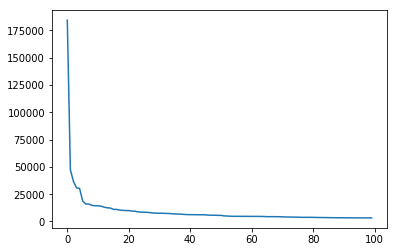

In [53]:
plt.plot(x, frequiences)

In [54]:
import numpy as np

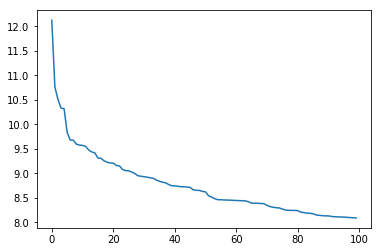

In [55]:
plt.plot(x, np.log(frequiences))

In [56]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [57]:
prob_1("我们")

0.001554473157589251

In [58]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [59]:
TOKEN = [str(t) for t in TOKEN]

In [60]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [61]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [62]:
def prob_1(word): return words_count[word]/len(TOKEN)

In [63]:
def prob_2(word1,word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [64]:
prob_2("我们","在")

4.683455274626447e-05

In [65]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probablity = prob_2(word, next_)
        sentence_pro *= probablity
    return sentence_pro

In [66]:
get_probablity("小明今天抽奖抽到一台苹果手机")

6.298565169317442e-39

In [67]:
for sen in [generate(gram =  create_grammar(sentence_grammar, split = '=>'), target = 'sentence') for i in range(10)]:
    print("sentence: {} with Prob: {}". format(sen, get_probablity(sen)))

sentence: 一个作家发现一段小明 with Prob: 5.371320863895103e-27
sentence: 一段程序员看着一段小明 with Prob: 5.371320863895103e-27
sentence: 一个红色的小明看着一个漂亮的程序员 with Prob: 4.394597697186387e-49
sentence: 一段漂亮的程序员写下一个小明 with Prob: 8.817991237044418e-38
sentence: 两只漂亮的红色的漂亮的漂亮的可爱的红色的可爱的作家看着两只程序员 with Prob: 3.8842503749768393e-103
sentence: 一段红色的小明看着一个可爱的小明 with Prob: 1.9618739719582084e-50
sentence: 两只小明看着一个小明 with Prob: 5.371320863895103e-27
sentence: 两只漂亮的作家写下两只可爱的漂亮的程序员 with Prob: 1.9097269756661729e-59
sentence: 一个红色的小明看着一段程序员 with Prob: 2.6768901969599125e-38
sentence: 两只可爱的可爱的作家看着两只红色的小明 with Prob: 4.601099572891856e-61
